In [1]:
%alias package {__import__('sys').executable} -m pip install --quiet --upgrade %l

In [2]:
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
def set_constrained_layout(plt):
    plt.rcParams['figure.constrained_layout.use'] = True
set_constrained_layout(plt)

In [3]:
%package numpy

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def subplots(
    n, 
    ncols = 1, visible = False, 
    *args, **kwargs
):
    fig, axs = plt.subplots(
        *args, **kwargs,
        ncols=ncols, 
        nrows=int(np.ceil(n / ncols))
    )
    for ax in axs.flatten():
        ax.set(visible=visible)
    return fig, axs

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.6.0 requires absl-py~=0.10, but you have absl-py 1.3.0 which is incompatible.
tensorflow-gpu 2.6.0 requires flatbuffers~=1.12.0, but you have flatbuffers 22.11.23 which is incompatible.
tensorflow-gpu 2.6.0 requires numpy~=1.19.2, but you have numpy 1.23.5 which is incompatible.
tensorflow-gpu 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.4.0 which is incompatible.
scipy 1.7.0 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.5 which is incompatible.


In [4]:
session_storage = 'downloads'

import os
os.makedirs(session_storage, exist_ok=True)

In [5]:
%package fsspec

import fsspec

fs_dataset = fsspec.filesystem(
    'simplecache', 
    target_protocol='https', 
    cache_storage=session_storage
)

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [6]:
%package pandas swifter scikit-learn xgboost

import pandas as pd

#import swifter
#swifter.set_defaults(
#    npartitions=None,
#    dask_thres=1,
#    scheduler='processes',
#    progress_bar=True,
#    progress_bar_desc=None,
#    allow_dask_on_strings=True,
#    force_parallel=True
#)


import sklearn as skl
import sklearn.base
import sklearn.compose
#import sklearn.ensemble
import sklearn.feature_extraction
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.pipeline
import sklearn.svm

import xgboost

import numpy as np

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.6.0 requires absl-py~=0.10, but you have absl-py 1.3.0 which is incompatible.
tensorflow-gpu 2.6.0 requires flatbuffers~=1.12.0, but you have flatbuffers 22.11.23 which is incompatible.
tensorflow-gpu 2.6.0 requires numpy~=1.19.2, but you have numpy 1.22.4 which is incompatible.
tensorflow-gpu 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.4.0 which is incompatible.


In [7]:
#%package scikit-learn-intelex

#import sklearnex
#sklearnex.patch_sklearn()

## Dataset

In [8]:
dataset_lyrics = None
with fs_dataset.open('https://github.com/cse158-fa22-team-pushystrokers/datasets/raw/main/dataset-lyrics.csv.gz') as f:
    dataset_lyrics = (
        pd.read_csv(
            f, 
            compression='gzip'
        ).astype({
            'artist': 'category',
            'year': 'datetime64',
            'genre': 'category'
        }, copy=False)
    )

In [9]:
dataset_lyrics

,song,year,artist,genre,lyrics
0,ego-remix,2009-01-01,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut..."
1,then-tell-me,2009-01-01,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem..."
2,honesty,2009-01-01,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...
3,you-are-my-rock,2009-01-01,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a..."
4,black-culture,2009-01-01,beyonce-knowles,Pop,"Party the people, the people the party it's po..."
...,...,...,...,...,...
235989,who-am-i-drinking-tonight,2012-01-01,edens-edge,Country,"I gotta say Boy, after only just a couple of d..."
235990,liar,2012-01-01,edens-edge,Country,I helped you find her diamond ring You made me...
235991,last-supper,2012-01-01,edens-edge,Country,Look at the couple in the corner booth Looks a...
235992,christ-alone-live-in-studio,2012-01-01,edens-edge,Country,When I fly off this mortal earth And I'm measu...


## EDA

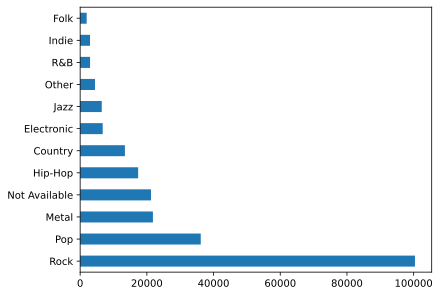

In [10]:
_ = dataset_lyrics['genre'].value_counts().plot(kind='barh')

In [11]:
#dataset_lyrics.drop(dataset_lyrics.index[dataset_lyrics['genre'] == 'Not Available'], inplace=True)

dataset_lyrics = dataset_lyrics[~dataset_lyrics['genre'].isin(['Other', 'Not Available'])]
dataset_lyrics['genre'] = dataset_lyrics['genre'].cat.remove_unused_categories()

/tmp/ipykernel_69723/504612158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_lyrics['genre'] = dataset_lyrics['genre'].cat.remove_unused_categories()


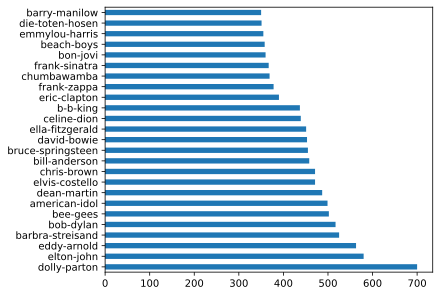

In [50]:
_ = dataset_lyrics['artist'].value_counts().head(25).plot(kind='barh')

In [ ]:
%package wordcloud joblib

import wordcloud
import joblib

def _df_lyrics_generate_wordclouds_per_genre(df):
    df_genre_lyrics = df.groupby('genre', observed=True)['lyrics'].agg(' '.join)
    def _f(lyrics):
        wc = wordcloud.WordCloud(background_color=None, mode='RGBA')
        return wc, wc.generate(lyrics)
    return df_genre_lyrics.swifter.apply(_f)
    
df_wcs = _df_lyrics_generate_wordclouds_per_genre(dataset_lyrics)

fig, axs = subplots(n=len(df_wcs), ncols=3)
for ax, (genre, (wc, im)) in zip(
    axs.flatten(), 
    df_wcs.items()
):
    ax.set(visible=True, title=genre)
    ax.axis('off')
    ax.imshow(im)
fig.show()

KeyboardInterrupt: 

## Predictive Task

## Model

### Baseline Model

In [12]:
def make_dataframe_transformer(cls):
    class cls_(cls):
        def transform(self, *args, **kwargs):
            res = super().transform(*args, **kwargs)
            if isinstance(res, pd.Series):
                return res.to_frame()
            return pd.DataFrame(res)
    return cls_

#### Category Transformer

In [13]:
cat_transformer_baseline = (
    skl.preprocessing.OneHotEncoder(
        handle_unknown='ignore'
    )
)

#### Text Transformer

In [14]:
import joblib

class BaseParallelTransformer(skl.base.TransformerMixin):
    def __init__(self, n_jobs, func, kwargs_func={}):
        super().__init__()
        self.n_jobs = n_jobs
        self.func = func
        self.kwargs_func = kwargs_func

    def fit(self, _X, _y=None):
        return self

    def transform(self, Xs, _y=None):
        return joblib.Parallel(n_jobs=self.n_jobs)(
            joblib.delayed(self.func)(X, **self.kwargs_func) 
                for X in Xs
        )

In [15]:
%package nltk

import nltk
nltk.download('all')


class WordTokenizer(BaseParallelTransformer):
    def __init__(self, n_jobs=1, **kwargs):
        super().__init__(
            n_jobs=n_jobs,
            func=nltk.word_tokenize,
            kwargs_func=kwargs
        )

class WordNetLemmatizer(BaseParallelTransformer):
    def __init__(self, n_jobs=1, **kwargs):
        base = nltk.stem.WordNetLemmatizer()
        super().__init__(
            n_jobs=n_jobs,
            func=lambda tokens: list(map(base.lemmatize, tokens)),
            kwargs_func=kwargs
        )

class SnowballStemmer(BaseParallelTransformer):
    def __init__(self, n_jobs=1, **kwargs):
        base = nltk.stem.SnowballStemmer(**kwargs)
        super().__init__(
            n_jobs=n_jobs,
            func=lambda tokens: list(map(base.stem, tokens)),
            kwargs_func={}
        )

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/r8chen/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/r8chen/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/r8chen/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/r8chen/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/r8chen/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_

In [16]:
import string


tokens_blocked = (
    set(nltk.corpus.stopwords.words('english'))
        | set(string.punctuation)
)
tokenizer_baseline = skl.pipeline.Pipeline([
    ('filter_cap',
        BaseParallelTransformer(
            n_jobs=-1, 
            func=lambda text: text.lower() 
        )
    ),
    ('tokenizer', WordTokenizer(n_jobs=-1, language='english')),
    ('filter_tokens', 
        BaseParallelTransformer(
            n_jobs=-1, 
            func=lambda tokens: filter(
                lambda token: token not in tokens_blocked,
                tokens
            )
        )
    ),
    ('lemmatizer', WordNetLemmatizer(n_jobs=-1)),
    ('stemmer', SnowballStemmer(n_jobs=-1, language='english'))
])

In [17]:
text_transformer_baseline = skl.pipeline.Pipeline([
    *tokenizer_baseline.steps,
    ('token_count_vec', 
        skl.feature_extraction.text.CountVectorizer(
            tokenizer=lambda x: x,
            preprocessor=None,
            lowercase=False,
            analyzer='word',
            ngram_range=(1, 2)
        )
    ),
    ('token_freq_vec', 
        skl.feature_extraction.text.TfidfTransformer()
    ),
])

#### Pipeline: Model

In [18]:
model_cv_baseline = skl.model_selection.GridSearchCV(
    skl.linear_model.LogisticRegression(
        max_iter=1000
    ),
    param_grid={
        'class_weight': ['balanced'],
        'solver': ['saga'],
        'C': np.logspace(start=-2, stop=-1, num=3),
    }, 
    cv=skl.model_selection.RepeatedStratifiedKFold(n_splits=2, n_repeats=1),
    scoring='balanced_accuracy',
    #n_jobs=-1,
    verbose=3
)

In [19]:
model_cv_gboost = skl.model_selection.GridSearchCV(
    xgboost.XGBClassifier(
        booster='gbtree',
        objective='multi:softmax',
        tree_method='gpu_hist', 
        predictor='gpu_predictor',
        sampling_method='gradient_based',
        enable_categorical=True,
        n_jobs=-1
    ),
    param_grid={
        'learning_rate': [.1, .005],
        'n_estimators': [200],
        'max_depth': [30],
        'subsample': [.75],

        #'gamma': [.1],
        #'reg_alpha': [.1],
        #'reg_lambda': [.1]
    },
    cv=skl.model_selection.RepeatedStratifiedKFold(n_splits=2, n_repeats=1),
    scoring='balanced_accuracy',
    n_jobs=-1,
    verbose=3
)

####

In [20]:
def _model_lyrics_genre_baseline(df_lyrics):
    predictor = skl.pipeline.Pipeline([
        ('feature_sel', skl.compose.ColumnTransformer([
            #('cat', cat_transformer_baseline, ['artist']),
            ('text', text_transformer_baseline, 'lyrics')
        ])),#, n_jobs=-1)),
        #('scaler', skl.preprocessing.StandardScaler(with_mean=False)),
        ('classifier_cv', model_cv_baseline)
        #('classifier_cv', model_cv_gboost)
    ])

    return predictor.fit(
        #df_lyrics[['artist', 'lyrics']],
        df_lyrics[['lyrics']],
        df_lyrics['genre']
    )

predictor_baseline = _model_lyrics_genre_baseline(
    dataset_lyrics#.sample(10000)
)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2] END C=0.01, class_weight=balanced, solver=saga;, score=0.337 total time= 1.7min
[CV 2/2] END C=0.01, class_weight=balanced, solver=saga;, score=0.342 total time= 1.7min
[CV 1/2] END C=0.03162277660168379, class_weight=balanced, solver=saga;, score=0.364 total time= 1.6min
[CV 2/2] END C=0.03162277660168379, class_weight=balanced, solver=saga;, score=0.371 total time= 1.8min


In [ ]:
predictor_baseline.named_steps['classifier_cv'].best_params_

AttributeError: ignored

In [ ]:
predictor_baseline.named_steps['classifier_cv'].best_score_

AttributeError: ignored

In [51]:
%package tensorflow

import tensorflow as tf
from tensorflow import keras as keras

#import tensorflow.compat.v1 as tf
#from tensorflow.compat.v1 import keras
#tf.disable_eager_execution()
#tf.disable_v2_behavior()

In [ ]:
#import scikeras as skeras
#import scikeras.wrappers

In [ ]:
from keras import backend as K
K.clear_session()

#import tensorflow as tf
def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)


df_lyrics = dataset_lyrics.sample(2000)

X_train = text_transformer_baseline.fit_transform(df_lyrics['lyrics'])

le = skl.preprocessing.OneHotEncoder()
y_train = le.fit_transform(df_lyrics[['genre']])


def _f():
    model = keras.Sequential([
        #keras.layers.Embedding(input_dim=X_train.shape[1], output_dim=100),
        #keras.layers.SpatialDropout1D(0.2),
        #keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2),
        #keras.layers.Dense(len(le.categories_), activation='softmax')'
        keras.layers.Dense(1000, activation='relu', input_dim=X_train.shape[1]),
        keras.layers.Dropout(0.75),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dropout(0.75),
        keras.layers.Dense(len(le.categories_[0]), activation='softmax')
    ])
    model.compile(
        loss='categorical_crossentropy', 
        optimizer=keras.optimizers.Adam(learning_rate=0.01), 
        metrics=['accuracy']
    )
    return model
    
clf = _f()#skeras.wrappers.KerasClassifier(_f)
clf_history = clf.fit(
    X_train, y_train, 
    epochs=256, batch_size=64,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_loss', 
            patience=3, 
            min_delta=0.0001
        )
    ]
)

Train on 1800 samples, validate on 200 samples


2022-11-29 13:44:25.486775: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10405 MB memory:  -> device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:89:00.0, compute capability: 6.1
2022-11-29 13:44:25.551417: W tensorflow/c/c_api.cc:291] Operation '{name:'training/Adam/learning_rate/Assign' id:332 op device:{requested: '', assigned: ''} def:{{{node training/Adam/learning_rate/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/learning_rate, training/Adam/learning_rate/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch 1/256
1800/1800 [==============================] - ETA: 0s - loss: 1.8339 - acc: 0.4356

/opt/conda/lib/python3.9/site-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2022-11-29 13:44:31.639996: W tensorflow/c/c_api.cc:291] Operation '{name:'loss/mul' id:179 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_2_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


1800/1800 [==============================] - 6s 3ms/sample - loss: 1.8339 - acc: 0.4356 - val_loss: 1.5829 - val_acc: 0.4900
Epoch 2/256
1800/1800 [==============================] - 6s 3ms/sample - loss: 1.2458 - acc: 0.6061 - val_loss: 1.8552 - val_acc: 0.4150
Epoch 3/256
1800/1800 [==============================] - 6s 3ms/sample - loss: 1.0037 - acc: 0.7133 - val_loss: 2.1368 - val_acc: 0.2450
Epoch 4/256
1800/1800 [==============================] - 6s 3ms/sample - loss: 0.9314 - acc: 0.7578 - val_loss: 2.3322 - val_acc: 0.1900


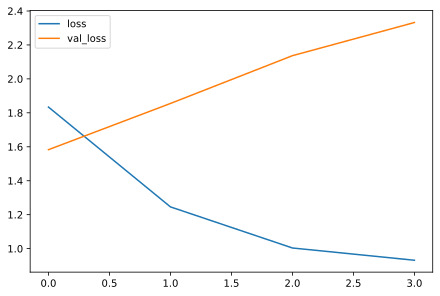

In [ ]:
plt.plot(clf_history.history['loss'], label='loss')
plt.plot(clf_history.history['val_loss'], label='val_loss')
plt.legend()


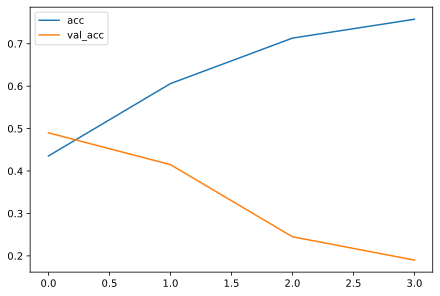

In [ ]:
plt.plot(clf_history.history['acc'], label='acc')
plt.plot(clf_history.history['val_acc'], label='val_acc')
plt.legend()


In [ ]:
import spacy
#import spacy_transformers
spacy.prefer_gpu()
spacy.cli.download('en_core_web_lg', False, False, '--quiet')

KeyboardInterrupt: 

In [ ]:
nlp = spacy.load('en_core_web_lg')

In [55]:
df_lyrics['genre'].unique()

['Pop', 'Hip-Hop', 'Rock', 'Metal', 'Country', 'Jazz', 'Electronic', 'Folk', 'R&B', 'Indie']
Categories (10, object): ['Country', 'Electronic', 'Folk', 'Hip-Hop', ..., 'Metal', 'Pop', 'R&B', 'Rock']

In [52]:
# TODO
df_lyrics = dataset_lyrics#.sample(2000)

X_train = np.array(df_lyrics['lyrics'])

le = skl.preprocessing.OneHotEncoder()
y_train = le.fit_transform(df_lyrics[['genre']]).toarray()


VOCAB_SIZE = 5000
encoder = keras.layers.TextVectorization(
    max_tokens=None#VOCAB_SIZE
)
encoder.adapt(X_train)

model = keras.Sequential([
    encoder,
    keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=128,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    keras.layers.Bidirectional(keras.layers.LSTM(128)),
    keras.layers.Dense(128, activation='softmax'),
    keras.layers.Dense(len(le.categories_[0]), activation='softmax')
])
model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.Adam(learning_rate=0.01), 
    metrics=['accuracy']
)

In [53]:
clf = model
clf_history = clf.fit(
    X_train, y_train, 
    epochs=64, batch_size=512,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_loss', 
            patience=3, 
            min_delta=0.0001
        )
    ]
)

Epoch 1/64
203/370 [===============>..............] - ETA: 6:03 - loss: 1.7346 - accuracy: 0.4677

KeyboardInterrupt: ignored